# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | flying fish cove
Processing Record 2 of Set 1 | sitka
Processing Record 3 of Set 1 | chicxulub puerto
City not found. Skipping...
Processing Record 4 of Set 1 | keflavik
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | ginir
Processing Record 7 of Set 1 | hihifo
City not found. Skipping...
Processing Record 8 of Set 1 | vernon
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | shimoda
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | porbandar
Processing Record 15 of Set 1 | mishan
Processing Record 16 of Set 1 | san antonio de pale
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | atar
Processing Record 21 of Set 1 | vallenar
Processing Record 

Processing Record 37 of Set 4 | postbauer-heng
Processing Record 38 of Set 4 | wewak
Processing Record 39 of Set 4 | kone
Processing Record 40 of Set 4 | whitehorse
Processing Record 41 of Set 4 | happy valley-goose bay
Processing Record 42 of Set 4 | mogadishu
Processing Record 43 of Set 4 | enewetak
Processing Record 44 of Set 4 | machico
Processing Record 45 of Set 4 | priozersk
Processing Record 46 of Set 4 | papao
Processing Record 47 of Set 4 | kerikeri
Processing Record 48 of Set 4 | richards bay
Processing Record 49 of Set 4 | walvis bay
Processing Record 0 of Set 5 | thompson
Processing Record 1 of Set 5 | krivosheino
Processing Record 2 of Set 5 | turpan
Processing Record 3 of Set 5 | nguigmi
Processing Record 4 of Set 5 | tsiombe
Processing Record 5 of Set 5 | petropavlovsk-kamchatsky
Processing Record 6 of Set 5 | patos fshat
Processing Record 7 of Set 5 | rio preto da eva
Processing Record 8 of Set 5 | balikpapan
Processing Record 9 of Set 5 | sao gabriel da cachoeira
Proc

Processing Record 29 of Set 8 | claveria
Processing Record 30 of Set 8 | playa vicente
Processing Record 31 of Set 8 | villa gesell
Processing Record 32 of Set 8 | bayan nur
City not found. Skipping...
Processing Record 33 of Set 8 | pytalovo
Processing Record 34 of Set 8 | katsuren-haebaru
Processing Record 35 of Set 8 | bubaque
Processing Record 36 of Set 8 | manismata
Processing Record 37 of Set 8 | fortaleza
Processing Record 38 of Set 8 | saint-denis
Processing Record 39 of Set 8 | tabas
Processing Record 40 of Set 8 | lupane
Processing Record 41 of Set 8 | beyneu
Processing Record 42 of Set 8 | suwayr
Processing Record 43 of Set 8 | zuunmod
Processing Record 44 of Set 8 | taghazout
Processing Record 45 of Set 8 | arraial do cabo
Processing Record 46 of Set 8 | thakhek
Processing Record 47 of Set 8 | salalah
Processing Record 48 of Set 8 | aketi
Processing Record 49 of Set 8 | reyes
Processing Record 0 of Set 9 | juan griego
Processing Record 1 of Set 9 | shevchenko
Processing Rec

Processing Record 19 of Set 12 | yangquan
Processing Record 20 of Set 12 | murghob
Processing Record 21 of Set 12 | villard-bonnot
Processing Record 22 of Set 12 | cole harbour
Processing Record 23 of Set 12 | alo
Processing Record 24 of Set 12 | islamkot
Processing Record 25 of Set 12 | ola
Processing Record 26 of Set 12 | urengoy
Processing Record 27 of Set 12 | ranohira
City not found. Skipping...
Processing Record 28 of Set 12 | harvard
Processing Record 29 of Set 12 | brooks
Processing Record 30 of Set 12 | kill devil hills
Processing Record 31 of Set 12 | naracoorte
Processing Record 32 of Set 12 | chateaudun
Processing Record 33 of Set 12 | miyaly
Processing Record 34 of Set 12 | zalingei
Processing Record 35 of Set 12 | ulladulla
Processing Record 36 of Set 12 | pueblo nuevo
Processing Record 37 of Set 12 | hami
Processing Record 38 of Set 12 | balykshi
Processing Record 39 of Set 12 | nadi
Processing Record 40 of Set 12 | wolmaransstad
Processing Record 41 of Set 12 | palmer
P

In [4]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,flying fish cove,-10.4217,105.6791,23.82,94,100,3.60,CX,1692123708
1,sitka,57.0531,-135.3300,13.94,88,100,5.66,US,1692123709
2,keflavik,64.0049,-22.5624,13.24,62,75,5.14,IS,1692123710
3,waitangi,-43.9535,-176.5597,9.34,96,100,3.52,NZ,1692123710
4,ginir,7.1333,40.7000,19.43,51,22,2.53,ET,1692123711


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,flying fish cove,-10.4217,105.6791,23.82,94,100,3.60,CX,1692123708
1,sitka,57.0531,-135.3300,13.94,88,100,5.66,US,1692123709
2,keflavik,64.0049,-22.5624,13.24,62,75,5.14,IS,1692123710
3,waitangi,-43.9535,-176.5597,9.34,96,100,3.52,NZ,1692123710
4,ginir,7.1333,40.7000,19.43,51,22,2.53,ET,1692123711


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

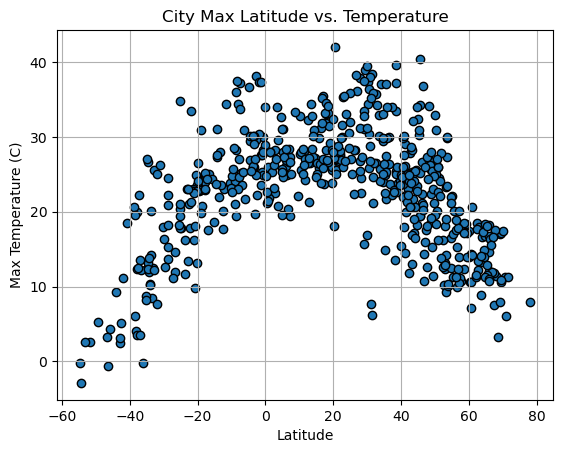

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker = 'o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

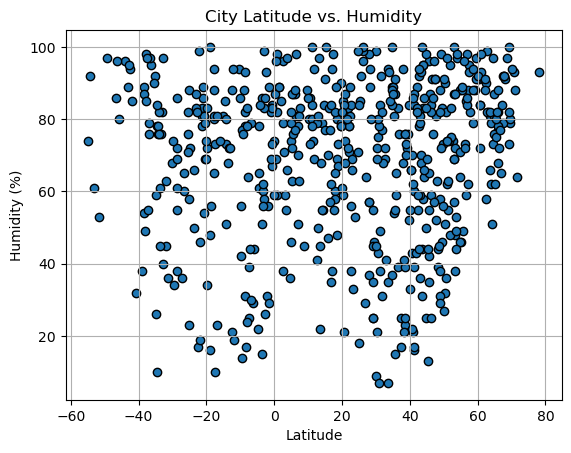

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker = 'o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

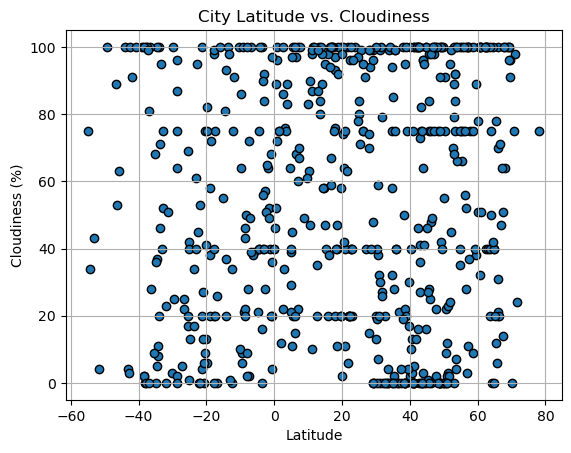

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker = 'o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

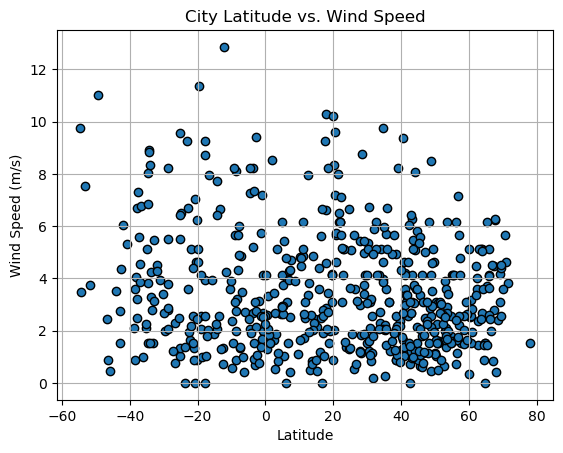

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker = 'o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sitka,57.0531,-135.3300,13.94,88,100,5.66,US,1692123709
2,keflavik,64.0049,-22.5624,13.24,62,75,5.14,IS,1692123710
4,ginir,7.1333,40.7000,19.43,51,22,2.53,ET,1692123711
5,vernon,50.2581,-119.2691,30.89,32,0,1.03,CA,1692123612
7,shimoda,34.6667,138.9500,23.95,89,58,3.96,JP,1692123711


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,flying fish cove,-10.4217,105.6791,23.82,94,100,3.60,CX,1692123708
3,waitangi,-43.9535,-176.5597,9.34,96,100,3.52,NZ,1692123710
6,adamstown,-25.0660,-130.1015,20.41,58,42,9.56,PN,1692123711
8,hithadhoo,-0.6000,73.0833,28.20,67,4,1.97,MV,1692123711
13,san antonio de pale,-1.4014,5.6325,23.64,89,52,5.72,GQ,1692123712


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3701623600360655


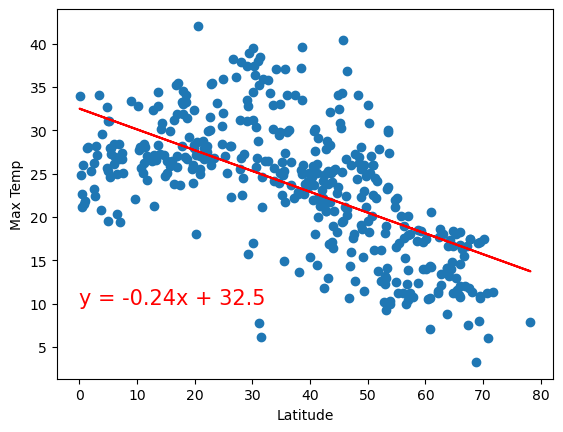

In [23]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp', (0,10))

The r-value is: 0.6372481169124862


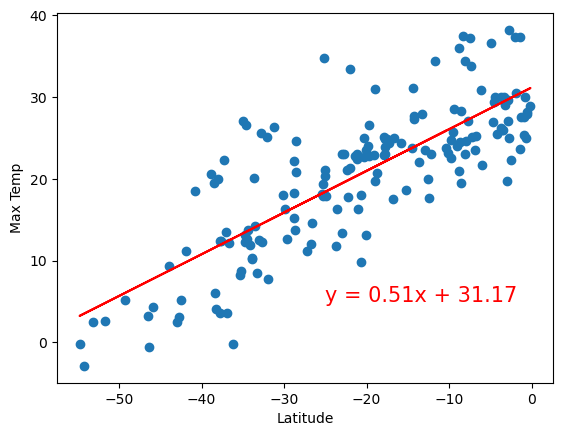

In [24]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max Temp', (-25,5))

**Discussion about the linear relationship:** The linear relationship in the northern hemisphere is negative and the r-value is close to 0, which means that there isn't a significant relationship between latitute and the temperature. In addition, the linear relationship in the southern hemisphere is positive and the r-value is closer to 1. Which means that there is a stronger relationship between the two in the southern part of the world. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.006050107390227766


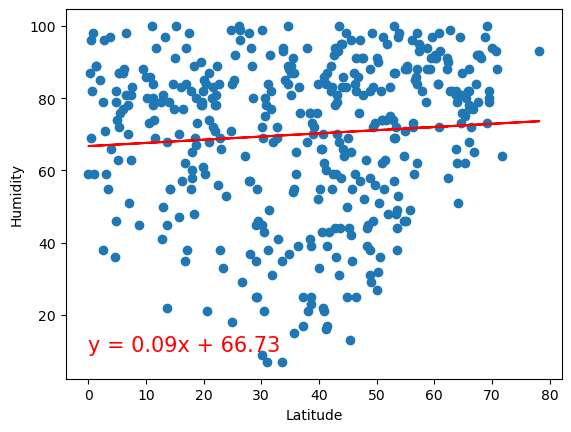

In [25]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity', (0,10))

The r-value is: 0.031867163415624386


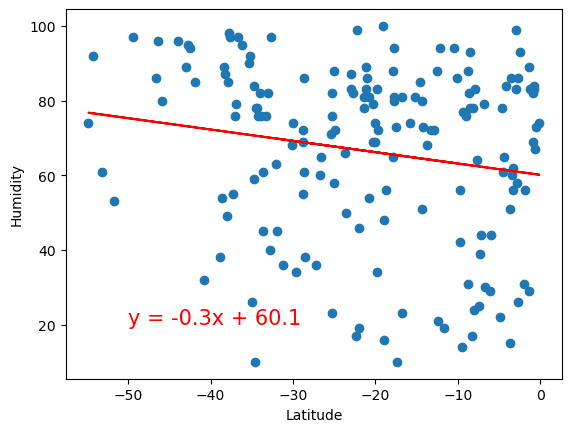

In [28]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity', (-50,20))

**Discussion about the linear relationship:** The linear relationships in both hemispheres between humidity and latitude show that these values are all over the place, meaning humidity doesn't have an impact depending on a cities latitute.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.003385362013354863


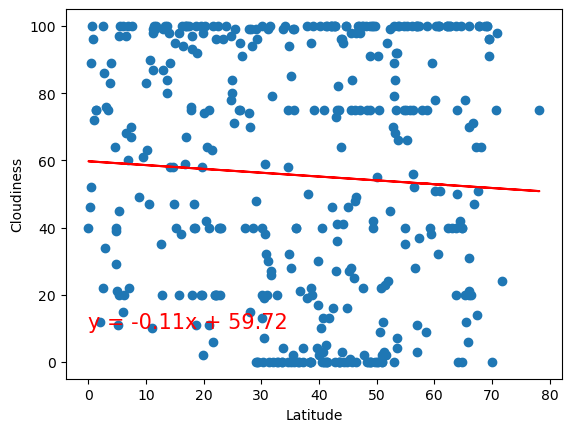

In [29]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness', (0,10))

The r-value is: 0.0006173576099202097


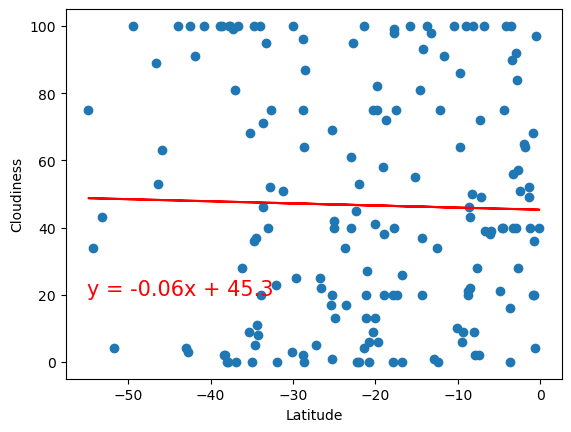

In [31]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness', (-55,20))

**Discussion about the linear relationship:** The linear relationships for cloudiness versus latitute is quite similar to that of humidity and latitute in that there is hardly a relationship. Both r-values in each hemisphere are quite close to 0, the southern just a bit more; meaning there is no statistical significance between the two. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008891105156842558


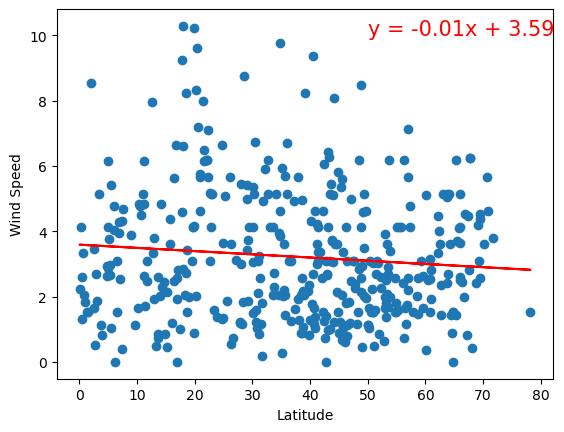

In [35]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', (50,10))

The r-value is: 0.014834625647627048


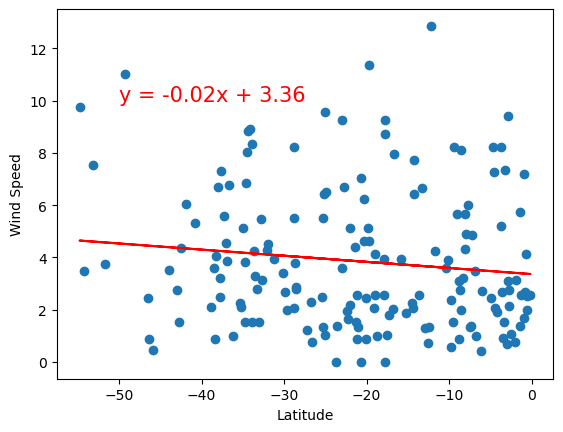

In [33]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', (-50,10))

**Discussion about the linear relationship:** The linear relationship in the northern hempishpere and southern are also similar here, with hardly any statistical significance. However we can notice that in the northern hempisphere there are more cities with lower wind speeds since there are more points densly packed together, while the southern has more sparatic points. There is also a very small negative linear relationship in both. 